In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

In [2]:
def best_objective(l, f=min):
    r = [l[0]]
    for li in l[1:]:
        r.append(f(r[-1], li))
    return r

In [9]:
df = {}

# deephyper
df["deephyper"] = pd.read_csv("exp/deephyper/model-4-true-true-1/results.csv")
df["deephyper"]["objective"] = np.exp(-df["deephyper"]["objective"])


df["gptune"] = pd.read_csv("exp/gptune/model-4-true-true-1/results.csv")
df["gptune"]["objective"] = np.exp(df["gptune"]["objective"])

df["random"] = pd.read_csv("10k-samples/model-4-true-true/results.csv")
df["random"]["objective"] = np.exp(-df["random"]["objective"])

<IPython.core.display.Javascript object>


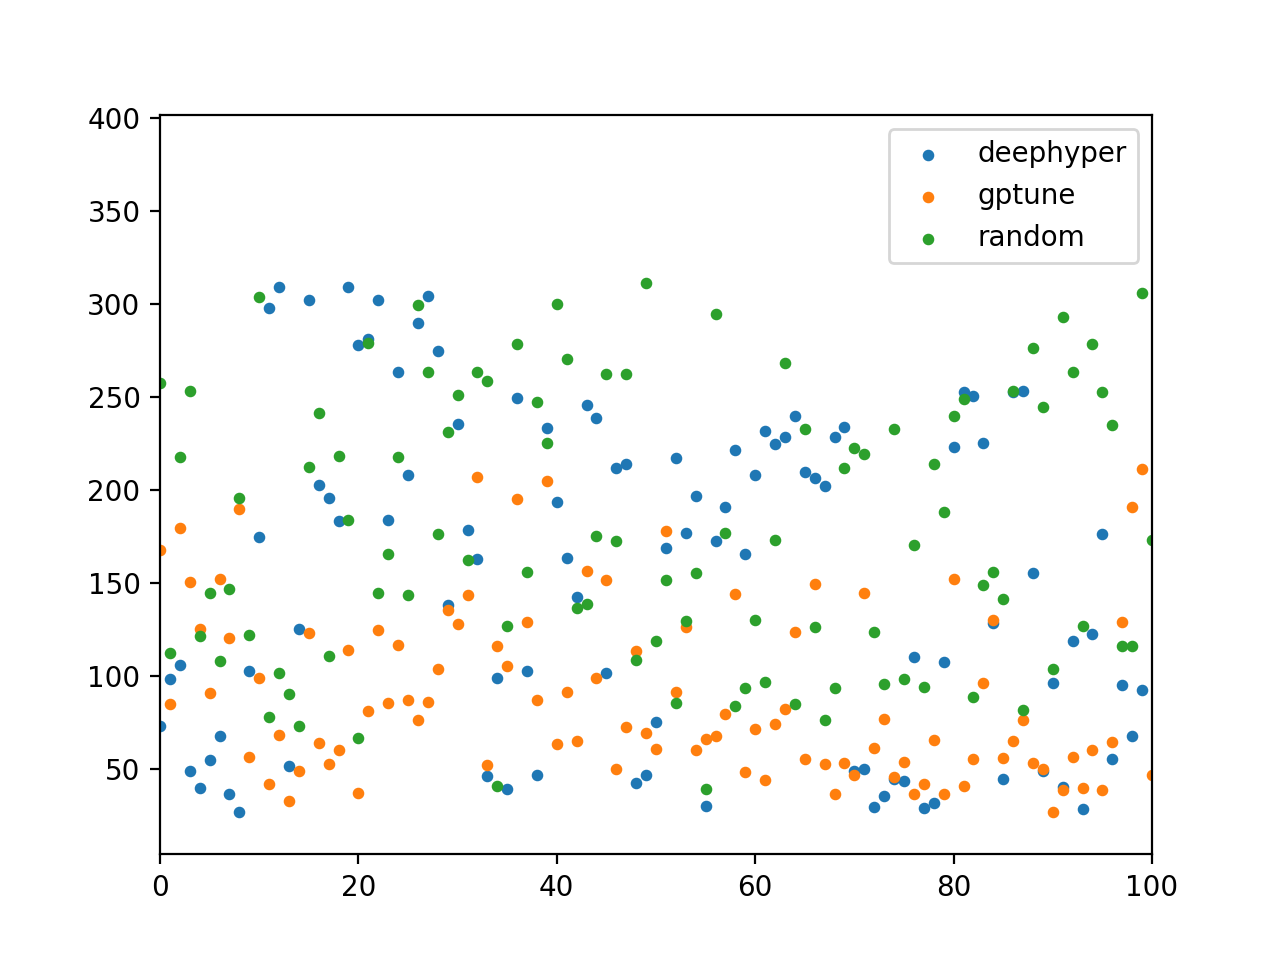

In [10]:
plt.figure()

for k, data in df.items():
    x = list(range(len(df[k]["objective"])))
    y = df[k]["objective"]
    plt.scatter(x, y, s=10, label=k)

plt.legend()
plt.xlim(0, 100)
plt.show()

<IPython.core.display.Javascript object>


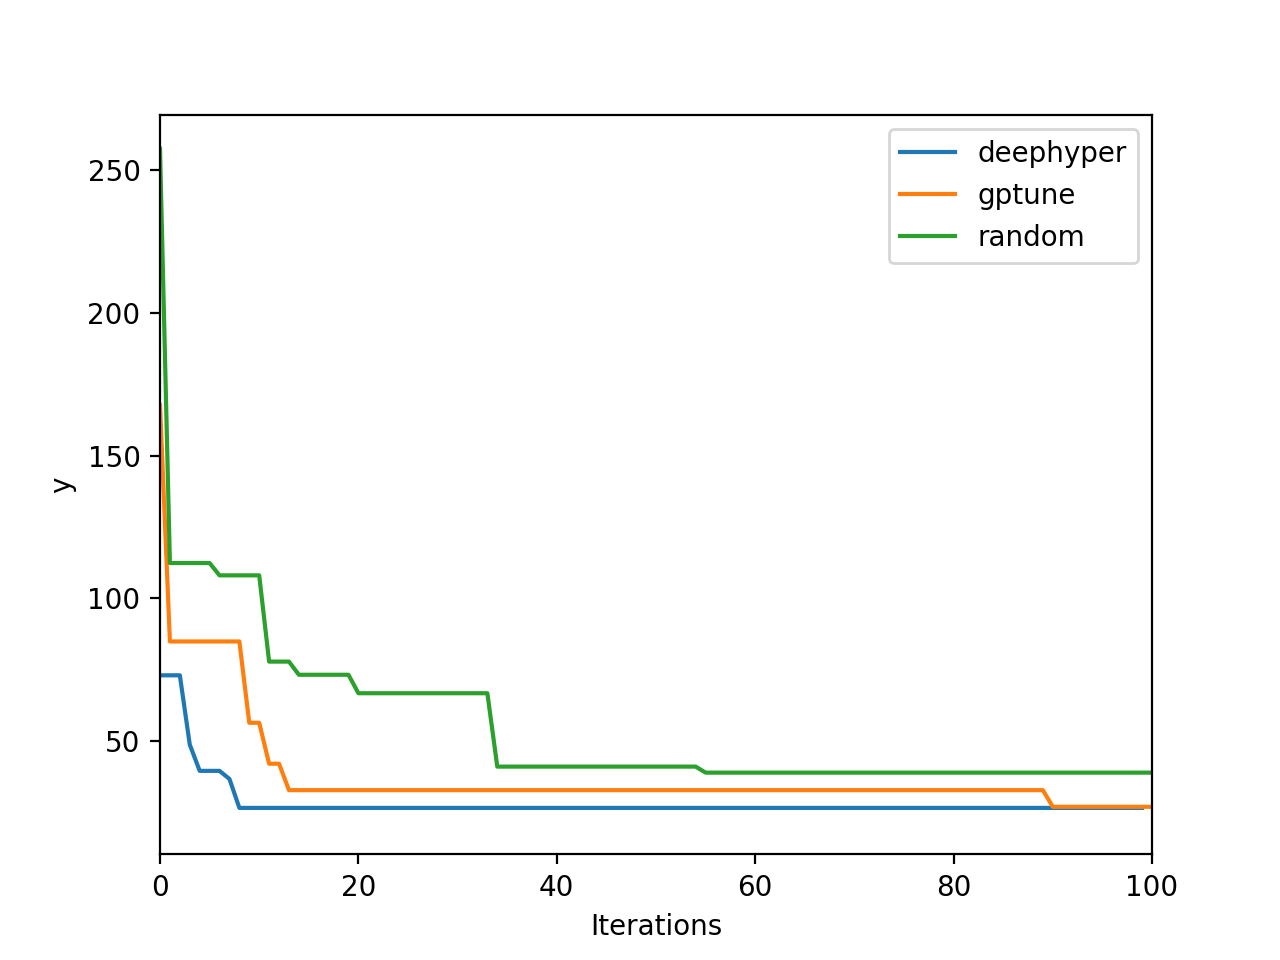

In [13]:
plt.figure()

for k, data in df.items():
    x = list(range(len(df[k]["objective"])))
    y = df[k]["objective"]
    plt.plot(x, best_objective(y), label=k)

plt.legend()
plt.xlim(0, 100)
plt.ylabel("y")
plt.xlabel("Iterations")
plt.show()